## Mount the Google Drive onto the Colab as the storage location.

Following the instructions returned from the below cell. You will click a web link and select the google account you want to mount, then copy the authorication code to the blank, press enter.

In [ ]:
# This must be run within a Google Colab environment 
from google.colab import drive
drive.mount('/content/gdrive')

## Append the directory location where you upload the start code folder (In this problem, *RLalgs*) to the sys.path

E.g. dir = '/content/drive/My Drive/RL/.', start code folder is inside "RL" folder.

In [ ]:
import sys
# sys.path.append('/content/gdrive/My Drive/RL/.')
sys.path.append('</dir/to/start/code/folder/.>')

Your code should remain in the block marked by<br />
\############################<br />
\# YOUR CODE STARTS HERE<br />
\# YOUR CODE ENDS HERE<br />
\############################<br />
Please don't edit anything outside the block.

In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
import numpy as np
import random
import matplotlib.pyplot as plt
import gym

## 1. Incremental Implementation of Average
We've finished the incremental implementation of average for you. Please call the function estimate with 1/step step size and fixed step size to compare the difference between this two on a simulated Bandit problem.<br />


In [15]:
from RLalgs.utils import estimate
random.seed(6885)
numTimeStep = 10000
q_h = np.zeros(numTimeStep + 1) # Q Value estimate with 1/step step size
q_f = np.zeros(numTimeStep + 1) # Q value estimate with fixed step size
FixedStepSize = 0.5 #A large number to exaggerate the difference
for step in range(1, numTimeStep + 1):
    if step < numTimeStep / 2:
      # gauss distribution
        r = random.gauss(mu = 1, sigma = 0.1)
    else:
        r = random.gauss(mu = 3, sigma = 0.1)
    
    #TIPS: Call function estimate defined in ./RLalgs/utils.py
    ############################
    # YOUR CODE STARTS HERE
    q_h[step] = estimate(q_h[step-1], 1/step, r)
    q_f[step] = estimate(q_h[step-1], FixedStepSize, r)
    # YOUR CODE ENDS HERE
    ############################
    
q_h = q_h[1:]
q_f = q_f[1:]

Plot the two Q value estimates. (Please include a title, labels on both axes, and legends)<br />

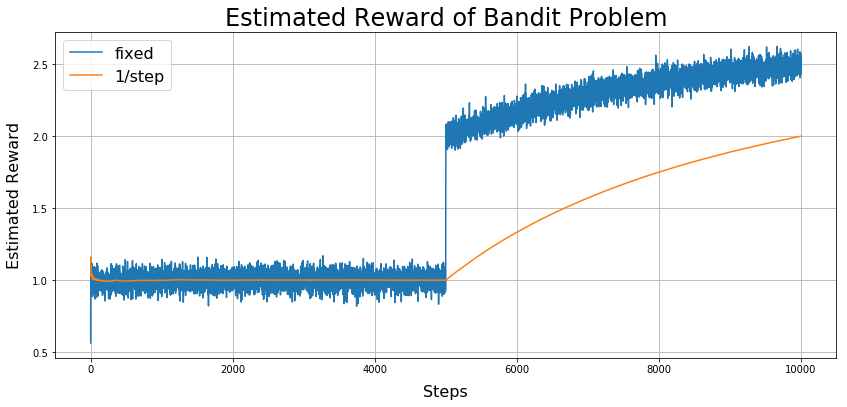

In [16]:
############################
# YOUR CODE STARTS HERE

plt.figure(figsize=(14,6))

# fixed stpsize
plt.plot(range(numTimeStep), q_f, label='fixed')
# 1/step stepsize
plt.plot(range(numTimeStep), q_h, label='1/step')
plt.grid()
plt.legend(fontsize=16)
plt.title('Estimated Reward of Bandit Problem', fontsize=24)
plt.ylabel('Estimated Reward', fontsize=16, labelpad=10)
plt.xlabel('Steps', fontsize=16, labelpad=10);

# YOUR CODE ENDS HERE
############################

## 2. $\epsilon$-Greedy for Exploration
In Reinforcement Learning, we are always faced with the dilemma of exploration and exploitation. $\epsilon$-Greedy is a trade-off between them. You are gonna implement Greedy and $\epsilon$-Greedy. We combine these two policies in one function by treating Greedy as $\epsilon$-Greedy where $\epsilon = 0$. Edit the function epsilon_greedy in ./RLalgs/utils.py.<br />


In [17]:
from RLalgs.utils import epsilon_greedy
np.random.seed(6885) #Set the seed to cancel the randomness
q = np.random.normal(0, 1, size = 5)
############################
# YOUR CODE STARTS HERE
greedy_action = epsilon_greedy(q, 0) #Use epsilon = 0 for Greedy
e_greedy_action = epsilon_greedy(q, 0.1) #Use epsilon = 0.1
# YOUR CODE ENDS HERE
############################
print('Values:')
print(q)
print('Greedy Choice =', greedy_action)
print('Epsilon-Greedy Choice =', e_greedy_action)

Values:
[ 0.61264537  0.27923079 -0.84600857  0.05469574 -1.09990968]
Greedy Choice = 0
Epsilon-Greedy Choice = 0


You should get the following results.<br />
Values:<br />
\[ 0.61264537  0.27923079 -0.84600857  0.05469574 -1.09990968\]<br />
Greedy Choice = 0<br />

## 3. Frozen Lake Environment 

In [18]:
env = gym.make('FrozenLake-v1')

### 3.1 Derive Q value from V value
Edit function action_evaluation in ./RLalgs/utils.py.<br />
TIPS: $q(s, a)=\sum_{s',r}p(s',r|s,a)(r+\gamma v(s'))$<br />

In [19]:
from RLalgs.utils import action_evaluation
v = np.ones(16)
q = action_evaluation(env = env.env, gamma = 1, v = v)
print('Action values:')
print(q)

Action values:
[[1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.33333333 1.33333333 1.33333333]
 [1.         1.         1.         1.        ]]


You should get Q values all equal to one except at State 14

Pseudo-codes of the following four algorithms can be found on Page 80, 83, 130, 131 of the Sutton's book.

### 3.2 Model-based RL algorithms

In [20]:
from RLalgs.utils import action_evaluation, action_selection, render

### 3.2.1 Policy Iteration
Edit the function policy_iteration and relevant functions in ./RLalgs/pi.py to implement the Policy Iteration Algorithm.<br />

In [21]:
from RLalgs.pi import policy_iteration
V, policy, numIterations = policy_iteration(env = env.env, gamma = 1, max_iteration = 500, theta = 1e-7)
print('State values:')
print(V)
print('Number of iterations to converge =', numIterations)

State values:
[0.82352769 0.82352712 0.82352673 0.82352653 0.82352786 0.
 0.52941059 0.         0.82352813 0.82352848 0.76470507 0.
 0.         0.88235229 0.94117614 0.        ]
Number of iterations to converge = 500


You should get values close to:<br />
State values:<br />
\[0.82352774 0.8235272  0.82352682 0.82352662 0.82352791 0.<br />
0.52941063 0.         0.82352817 0.82352851 0.76470509 0.<br />0.         0.88235232 0.94117615 0.\]

In [22]:
#Uncomment and run the following to evaluate your result, comment them when you generate the pdf
Q = action_evaluation(env = env.env, gamma = 1, v = V)
policy_estimate = action_selection(Q)
render(env, policy_estimate)

  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
Episode ends. Reward = 1.0


### 3.2.2 Value Iteration
Edit the function value_iteration and relevant functions in ./RLalgs/vi.py to implement the Value Iteration Algorithm.<br />

In [23]:
from RLalgs.vi import value_iteration
V, policy, numIterations = value_iteration(env = env.env, gamma = 1, max_iteration = 500, theta = 1e-7)
print('State values:')
print(V)
print('Number of iterations to converge =', numIterations)

State values:
[0.82352513 0.82352369 0.82352267 0.82352214 0.82352544 0.
 0.5294087  0.         0.82352604 0.82352689 0.76470365 0.
 0.         0.88235115 0.94117554 0.        ]
Number of iterations to converge = 500


You should get values close to:<br />
State values:<br />
\[0.82352773 0.82352718  0.8235268 0.8235266 0.8235279 0.<br />
0.52941062 0.         0.82352816 0.8235285 0.76470509 0.<br />0.         0.88235231 0.94117615 0.\]

In [24]:
#Uncomment and run the following to evaluate your result, comment them when you generate the pdf
Q = action_evaluation(env = env.env, gamma = 1, v = V)
policy_estimate = action_selection(Q)
render(env, policy_estimate)

  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
Episode ends. Reward = 1.0


### 3.3 Model free RL algorithms

### 3.3.1 Q-Learning
Edit the function QLearning in ./RLalgs/ql.py to implement the Q-Learning Algorithm.<br />

In [25]:
from RLalgs.ql import QLearning
Q = QLearning(env = env.env, num_episodes = 1000, gamma = 1, lr = 0.1, e = 0.1)
print('Action values:')
print(Q)

Action values:
[[0.61929514 0.42943355 0.37163264 0.47507716]
 [0.29077734 0.0368747  0.02242487 0.13771245]
 [0.03900675 0.22106153 0.04775338 0.05058328]
 [0.10441369 0.00335682 0.01979717 0.04255401]
 [0.62126389 0.22670634 0.22445235 0.30823701]
 [0.         0.         0.         0.        ]
 [0.09097426 0.06664275 0.26522592 0.02040252]
 [0.         0.         0.         0.        ]
 [0.19685345 0.24458409 0.2486435  0.62497349]
 [0.341029   0.61204385 0.46271778 0.35444468]
 [0.45700481 0.31150904 0.3245973  0.21643099]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.24078551 0.3618692  0.72185725 0.3718721 ]
 [0.53666747 0.64035382 0.75210609 0.57719393]
 [0.         0.         0.         0.        ]]


Generally, you should get non-zero action values on non-terminal states.

In [26]:
#Uncomment the following to evaluate your result, comment them when you generate the pdf
env = gym.make('FrozenLake-v1')
policy_estimate = action_selection(Q)
render(env, policy_estimate)

  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
Episode ends. Reward = 0.0


### 3.3.2 SARSA
Edit the function SARSA in ./RLalgs/sarsa.py to implement the SARSA Algorithm.<br />

In [27]:
from RLalgs.sarsa import SARSA
Q = SARSA(env = env.env, num_episodes = 1000, gamma = 1, lr = 0.1, e = 0.1)
print('Action values:')
print(Q)

Action values:
[[0.00513336 0.01042344 0.02218303 0.00534489]
 [0.00631895 0.00444243 0.02369882 0.00766787]
 [0.05658902 0.0343646  0.06825479 0.02311391]
 [0.01968425 0.00378194 0.00429154 0.00167073]
 [0.03159008 0.00491801 0.01037212 0.00640637]
 [0.         0.         0.         0.        ]
 [0.14593547 0.08478312 0.07272358 0.00378096]
 [0.         0.         0.         0.        ]
 [0.0007384  0.02652534 0.05908663 0.0032975 ]
 [0.00418347 0.00635252 0.23714938 0.01770097]
 [0.23729992 0.03102192 0.03698321 0.02736964]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.06557132 0.00166092 0.48021862 0.06460003]
 [0.12444424 0.19725844 0.67848272 0.18613349]
 [0.         0.         0.         0.        ]]


Generally, you should get non-zero action values on non-terminal states.

In [28]:
#Uncomment the following to evaluate your result, comment them when you generate the pdf
env = gym.make('FrozenLake-v1')
policy_estimate = action_selection(Q)
render(env, policy_estimate)

  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
Episode ends. Reward = 0.0


### 3.4 Human
You can play this game if you are interested. See if you can get the frisbee either with or without the model.

In [29]:
from RLalgs.utils import human_play
# Uncomment and run the following to play the game, comment it when you generate the pdf
# env = gym.make('FrozenLake-v1')
# human_play(env)

## 4. Exploration VS. Exploitation
Try to reproduce Figure 2.2 (the upper one is enough) of the Sutton's book based on the experiment described in [Chapter 2.3](http://incompleteideas.net/book/RLbook2020.pdf).<br />

In [357]:
from RLalgs.utils import *

class Bandit():
    def __init__(self, num_arm, num_iter, eps):
        """
        Bandit problem following e-greedy policy, the arm machien follow normal distribution

        Inputs:
        - num_arm: the number of arm machine
        - num_iter: the number of total actions to be taken
        - eps: epsilon in e-greedy policy
        
        """
        # number of arms
        self.num_arm = num_arm
        # number of total actions to be taken
        self.num_iter = num_iter
        # epsilon
        self.eps = eps
        # record average reward for the whole game
        self.reward = 0
        # self.reward_hist = [0]
        self.reward_hist = np.zeros(num_iter+1)
        self.reward_hist[0] = 0
        # record average reward for each arms
        self.q = np.zeros(num_arm)
        # number of actions taken for the whole game
        self.num_step = 0
        # number of actions taken on each arms
        self.num_step_arm = np.zeros(num_arm)
        # initialize arms
        self.arms = None
        self.init_arms()

    def reset(self, eps, num_iter):
        """
        reset eps and reward
        """
        self.reward = 0
        # self.reward_hist = [0]
        self.reward_hist = np.zeros(num_iter+1)
        self.reward_hist[0] = 0
        self.q = np.zeros_like(self.q)
        self.num_step = 0
        self.num_step_arm = np.zeros_like(self.num_step_arm)
        self.eps = eps
        self.num_iter = num_iter
    
    def init_arms(self):
        """
        Initialize arms by randomly choose mu and std for normal distribution

        mu follows normal distribution
        std = 1

        store in array self.arms, which has size 2*num_arm
        first row of arms is mu
        second row of arms is std
        """
        assert self.arms == None, 'Arms already defined'

        # first row is mu, secound row is std
        # arms = np.random.rand(2, self.num_arm)
        arms = np.random.normal(0,1,(2,self.num_arm))

        # arms[0,:] = arms[0,:]*4 - 2
        # arms[1,:] = arms[1,:]*10 + 20
        arms[1,:] = 1

        self.arms = arms
        
    def take_action(self, a):
        """
        Take action a, range of a is [0,num_arm-1], return the reward of that action

        Input:
        - a: the action to be taken
        
        Output:
        - r: reward of that action
        """

        return np.random.normal(self.arms[0,a], self.arms[1,a])

    def step(self):
        """
        one step forward, choose the action following the e-greedy policy
        """

        # e-greedy policy
        a = epsilon_greedy(self.q, self.eps)
        # get reward of that action
        r = self.take_action(a)
        # update steps taken
        self.num_step += 1
        self.num_step_arm[a] += 1
        # update the total average reward and the average reward of that arm
        self.reward = estimate(self.reward, 1/self.num_step, r)
        # self.reward_hist.append(self.reward)
        self.q[a] = estimate(self.q[a], 1/self.num_step_arm[a], r)

    def run(self):
        """
        play the game for iteration times

        Output:
        - history of total average reward
        """
        for i in range(self.num_iter):
            self.step()
            self.reward_hist[i+1] = self.reward

        return self.reward_hist




Repeated 100 times
Repeated 200 times
Repeated 300 times
Repeated 400 times
Repeated 500 times
Repeated 600 times
Repeated 700 times
Repeated 800 times
Repeated 900 times
Repeated 1000 times


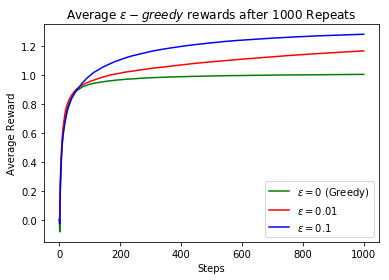

In [363]:
# Plot the average reward
############################


num_arms = 10
num_iter = 1000
num_repeat = 1000

hist_0 = np.zeros(num_iter+1)
hist_001 = np.zeros(num_iter+1)
hist_01 = np.zeros(num_iter+1)


for i in range(1, num_repeat+1):
    eps = 0
    bandit = Bandit(num_arms, num_iter, 0)
    hist_0 += bandit.run()

    # eps = 0.01
    bandit.reset(0.01, num_iter)
    hist_001 += bandit.run()


    # eps = 0.1
    bandit.reset(0.1, num_iter)
    hist_01 += bandit.run()

    if i%100 == 0:
        print('Repeated %d times' % (i))

hist_0 /= num_repeat
hist_001 /= num_repeat
hist_01 /= num_repeat

plt.figure()
plt.plot(hist_0, 'g', label="$\epsilon=0$ (Greedy)")
plt.plot(hist_001, 'r', label="$\epsilon=0.01$")
plt.plot(hist_01, 'b', label="$\epsilon=0.1$")
plt.title("Average $\epsilon-greedy$ rewards after %d Repeats" % (num_repeat)) 
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.legend();


# YOUR CODE ENDS HERE
############################

You should get curves similar to that in the book.